# Travel Insurance Dataset - EDA, Statistical Inference, and Applying ML models

## Objectives:
- Perform EDA.
- Perform statistical inference with hypothesis testing and defining confidence intervals.
- Apply machine learning models, perform hyperparameter tuning, model ensembling and model selection.

## Questions to explore:
- How do age, employment type, annual income, chronic diseases correlate with the purchase of a travel insurance?
- Do families with more than 2 members tend to buy travel insurances more?
- Are frequent flyers more or less likely to purchase a travel insurance?

## Bias:
- The dataset is relatively small and there is a significant amount of duplicate rows (around 37%, which may or may not be real duplicates).
- The dataset contains information collected in 2019, which is pre-pandemic. The pandemic might have changed the purchasing habits of travelers.
- We are not sure where is this data from. That is, we cannot answer some questions, e.g. how does the annual income compare to minimum/medium wage in that region?

## Dataset description

**General description:**
A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers.
The New Insurance Package Also Includes Covid Cover.
The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History.
The Insurance Was Offered To Some Of The Customers In 2019 And The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.
The Data Is Provided For Almost 2000 Of Its Previous Customers And You Are Required To Build An Intelligent Model That Can Predict If The Customer Will Be Interested To Buy The Travel Insurance Package Based On Certain Parameters Given Below.

**Features:**
1) Age - Age Of The Customer
2) Employment Type - The Sector In Which Customer Is Employed
3) GraduateOrNot - Whether The Customer Is College Graduate Or Not
4) AnnualIncome - The Yearly Income Of The Customer In Indian Rupees (Rounded To Nearest 50 Thousand Rupees)
5) FamilyMembers - Number Of Members In Customer's Family
6) ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
7) FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On At least 4 Different Instances In The Last 2 Years (2017-2019).
8) EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country (Not Necessarily Using The Company's Services)
9) TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.



In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
import textwrap
from matplotlib.gridspec import GridSpec
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from scipy.stats import mannwhitneyu

import helper_functions as hf

import sqlite3 as sql

sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
data = pd.read_csv('TravelInsurancePrediction.csv', index_col='Unnamed: 0')

<IPython.core.display.Javascript object>

# 1. Exploratory Data Analysis

In [4]:
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


<IPython.core.display.Javascript object>

Let's change the currency from rupees to euros:

In [5]:
data['AnnualIncome_eur'] = round(data.AnnualIncome * 0.0113, 2)
data.drop(columns=['AnnualIncome'], inplace=True)

<IPython.core.display.Javascript object>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1987 non-null   int64  
 1   Employment Type      1987 non-null   object 
 2   GraduateOrNot        1987 non-null   object 
 3   FamilyMembers        1987 non-null   int64  
 4   ChronicDiseases      1987 non-null   int64  
 5   FrequentFlyer        1987 non-null   object 
 6   EverTravelledAbroad  1987 non-null   object 
 7   TravelInsurance      1987 non-null   int64  
 8   AnnualIncome_eur     1987 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 155.2+ KB


<IPython.core.display.Javascript object>

In [7]:
data.nunique()

Age                    11
Employment Type         2
GraduateOrNot           2
FamilyMembers           8
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
AnnualIncome_eur       30
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.0,0.0,0.0,1.0,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0
AnnualIncome_eur,1987.0,10540.221439,4258.469238,3390.0,6780.0,10170.0,14125.0,20340.0


<IPython.core.display.Javascript object>

Let's change the data types for categorical columns:

In [9]:
object_cols = ['ChronicDiseases', 'TravelInsurance']
data[object_cols] = data[object_cols].astype("object")

<IPython.core.display.Javascript object>

## 1.1. Missing values

There are no missing values in this table.

<Axes: >

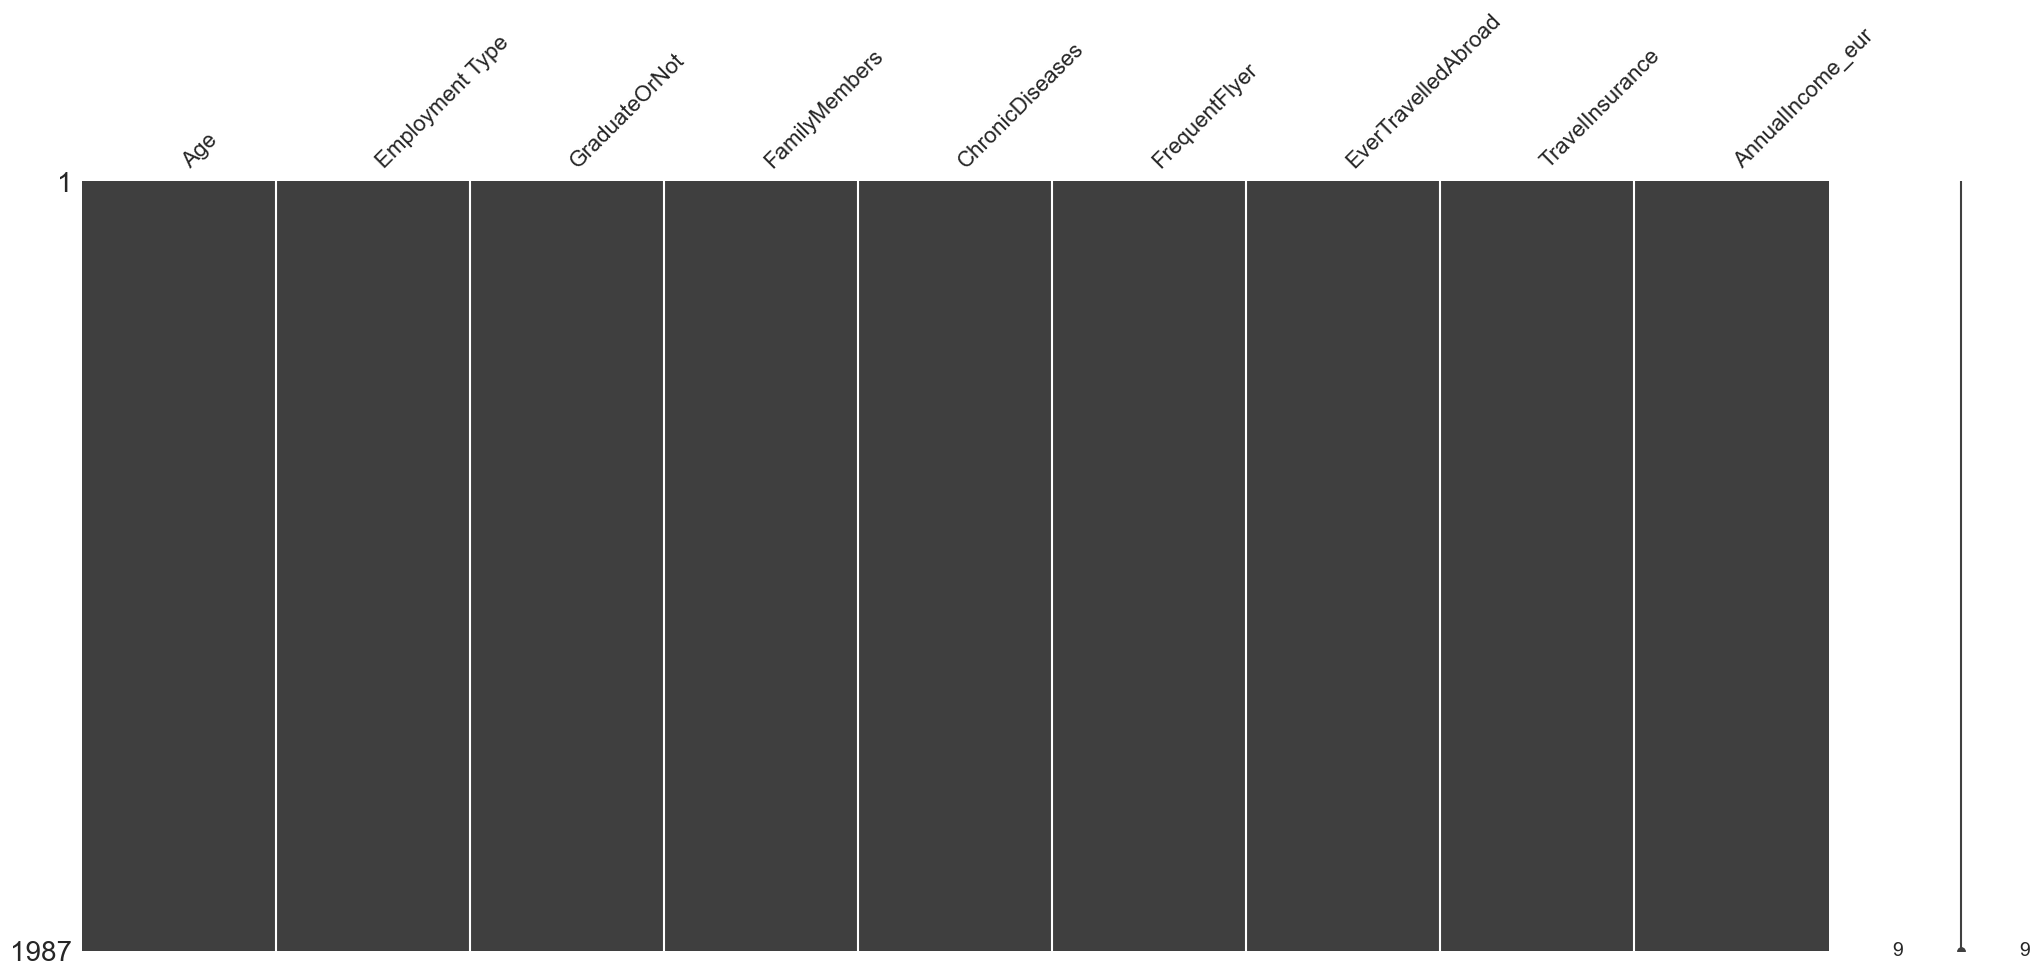

<IPython.core.display.Javascript object>

In [10]:
msno.matrix(data)

In [11]:
data.isna().sum().sort_values(ascending=False)

Age                    0
Employment Type        0
GraduateOrNot          0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
AnnualIncome_eur       0
dtype: int64

<IPython.core.display.Javascript object>

## 1.2. Duplicate values

There are around 37% of duplicates in this table. This is a significant amount, so we shouldn't blindly drop them. For this analysis, let's assume these are real costumers with similar attributes and keep all the data, but it would be better to contact the travel company and check for possible data entry issues. It would be sufficient to ask for the number of unique customers during that period to begin with.

In [12]:
len(data) - len(data.drop_duplicates())  # count duplicate values

738

<IPython.core.display.Javascript object>

In [13]:
duplicated_df = data[data.duplicated()]
duplicated_df

,Age,Employment Type,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_eur
69,31,Government Sector,No,4,0,No,No,0,3390.0
103,26,Private Sector/Self Employed,Yes,5,0,No,Yes,1,15820.0
117,31,Government Sector,Yes,5,0,No,No,0,4520.0
148,25,Private Sector/Self Employed,Yes,4,0,No,Yes,1,15820.0
164,28,Government Sector,Yes,6,0,No,No,0,3390.0
...,...,...,...,...,...,...,...,...,...
1978,34,Private Sector/Self Employed,Yes,5,0,No,No,1,7910.0
1979,28,Private Sector/Self Employed,Yes,4,1,No,No,0,12430.0
1980,25,Private Sector/Self Employed,No,5,1,No,No,0,12995.0
1984,28,Private Sector/Self Employed,Yes,6,1,No,No,0,12995.0


<IPython.core.display.Javascript object>

In [14]:
len(data.columns.tolist()) == len(
    set(data.columns.tolist())
)  # see if there are duplicate columns

True

<IPython.core.display.Javascript object>

In [15]:
len(data[data.duplicated()]) / len(data)

0.3714141922496225

<IPython.core.display.Javascript object>

## 1.3. Handling outliers

There are no outliers in the numeric columns.

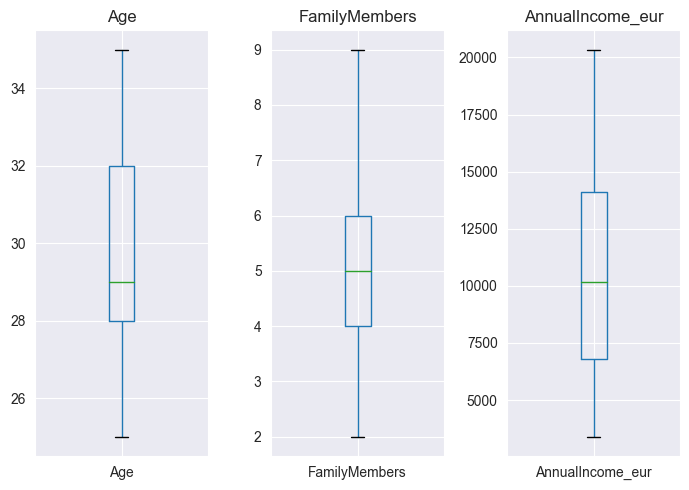

<IPython.core.display.Javascript object>

In [16]:
num_cols = data.select_dtypes(exclude=["object"]).columns.tolist()
numeric_cols = data[num_cols]

fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols.columns), figsize=(7, 5))

for i, column in enumerate(numeric_cols.columns):
    ax = (
        axes[i] if len(numeric_cols.columns) > 1 else axes
    )
    numeric_cols.boxplot(column=column, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

The majority of clients are between 28 and 32 y.o., have 4-6 family members and most of them have annual income between 6780 and 14125 euros.

## 1.4. Categorical features

##### Main insights and observations:
- Most tourists (almost 65%) in the dataset haven't purchased a travel insurance.
- Most tourists work in the private sector or are self-employed. In each group, the share of people who have purchased a travel insurance is lower.
- The share of people who purchased a travel insurance is higher in the Private sector/Self-employed group. This may be due to the fact that the other group - people working in the Government sector - get their insurance provided by the government, so they don't need to buy one at the travel agency. But the class size for Government sector workers is small, so this may not be representative of the broader population.
- Most clients in the dataset are college graduates. Around a third part of clients have purchased insurance in each category - graduates and non-graduates.
- Almost a third of people in the dataset have chronic diseases. The probability of purchasing a travel insurance is slightly higher among people who have chronic diseases.
- The share of frequent flyers in the dataset is around 21%. The majority of frequent flyers (around 57%) tend to buy an insurance.
- The majority of customers in the dataset have never travelled abroad before (around 80%). The probability of purchasing a travel insurance is noticeably higher among people who have travelled abroad before.

##### Notes:
- The classes are mostly imbalanced, so we should be cautious with our conclusions about the population.


In [17]:
cat_cols = data.select_dtypes(include=['object', 'category']).columns
cat_df = data[cat_cols]

<IPython.core.display.Javascript object>

In [18]:
for col in cat_df:
    print(f"Unique values for {col}:")
    print(cat_df[col].unique())
    print("-"*20)

Unique values for Employment Type:
['Government Sector' 'Private Sector/Self Employed']
--------------------
Unique values for GraduateOrNot:
['Yes' 'No']
--------------------
Unique values for ChronicDiseases:
[1 0]
--------------------
Unique values for FrequentFlyer:
['No' 'Yes']
--------------------
Unique values for EverTravelledAbroad:
['No' 'Yes']
--------------------
Unique values for TravelInsurance:
[0 1]
--------------------


<IPython.core.display.Javascript object>

The categorical features contain only Yes/No or 0/1 values. To make everything more consistent, we will replace "Yes" with 1 and "No" with 0.

In [19]:
data = data.replace({'Yes': '1', 'No': '0'})
data[['TravelInsurance', 'ChronicDiseases']] = data[['TravelInsurance', 'ChronicDiseases']].replace({0: '0', 1: '1'})
data[cat_cols] = data[cat_cols].astype('object')

<IPython.core.display.Javascript object>

**Note:**
in the plots below, 0 means 'No' and 1 means 'Yes'. In the plots on the right, the percentages are calculated from the overall total (not separately within each category).

<Axes: title={'center': 'Counts of Tourists based on Purchase of a Travel Insurance'}, xlabel='Travel Insurance Purchase (0 - No, 1 - Yes)', ylabel='Count'>

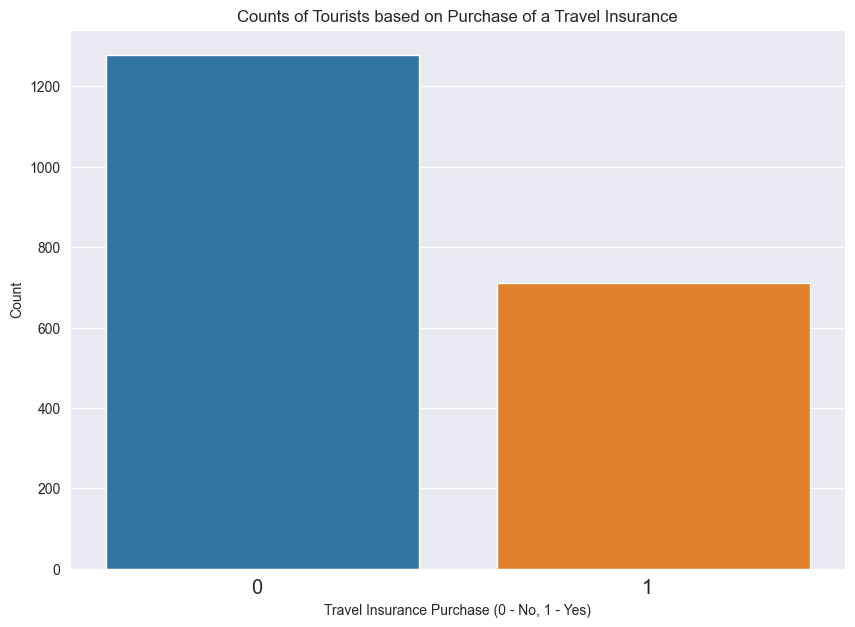

<IPython.core.display.Javascript object>

In [20]:
hf.plot_sns_countplot(data, x='TravelInsurance', plot_order=['0', '1'],
                      x_label='Travel Insurance Purchase (0 - No, 1 - Yes)',
                      y_label='Count', title='Counts of Tourists based on Purchase of a Travel Insurance',
                      xtick_rot=0)

In [21]:
data.TravelInsurance.value_counts() / len(data)

TravelInsurance
0    0.642677
1    0.357323
Name: count, dtype: float64

<IPython.core.display.Javascript object>

- Most tourists in the dataset haven't purchased a travel insurance.

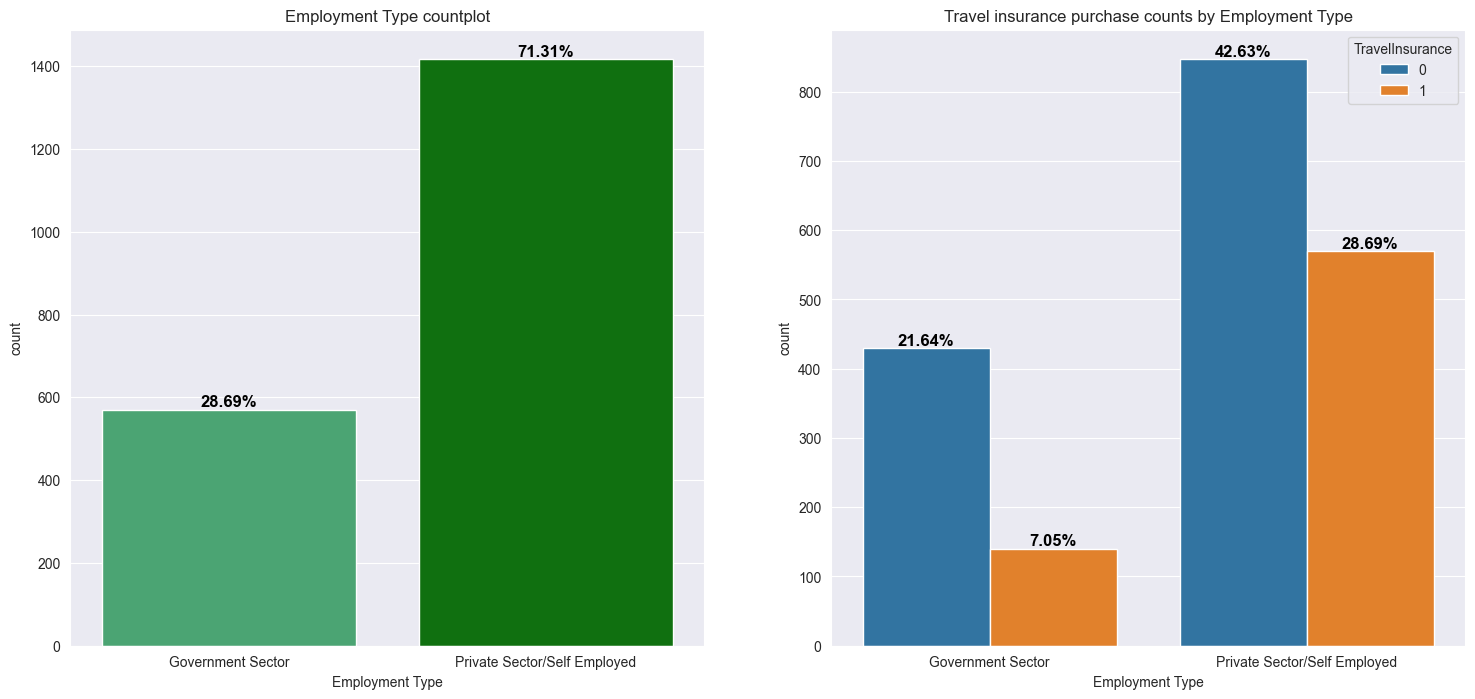

<IPython.core.display.Javascript object>

In [22]:
hf.visualize_double_countplots(data, 'Employment Type', 'TravelInsurance',
                            'Employment Type countplot',
                            'Travel insurance purchase counts by Employment Type',
                             left_plot_colors = ["mediumseagreen", "green"])

Let's also calculate the probability of purchasing a travel insurance for each employment type:

In [23]:
short_df = data[['Employment Type', 'TravelInsurance']]
short_df.TravelInsurance = short_df.TravelInsurance.astype('int')
short_df.groupby(['Employment Type']).mean()

,TravelInsurance
Employment Type,
Government Sector,0.245614
Private Sector/Self Employed,0.402258


<IPython.core.display.Javascript object>

- Most tourists work in the private sector or are self-employed. In each group, the share of people who purchased a travel insurance is lower.
- The share of people who purchased a travel insurance is higher in the Private sector/Self-employed group. This may be due to the fact that the other group - people working in the Government sector - get their insurance provided by the government, so they don't need to buy one at the travel agency. But the class size for Government sector workers is small, so this may not be representative of the broader population.

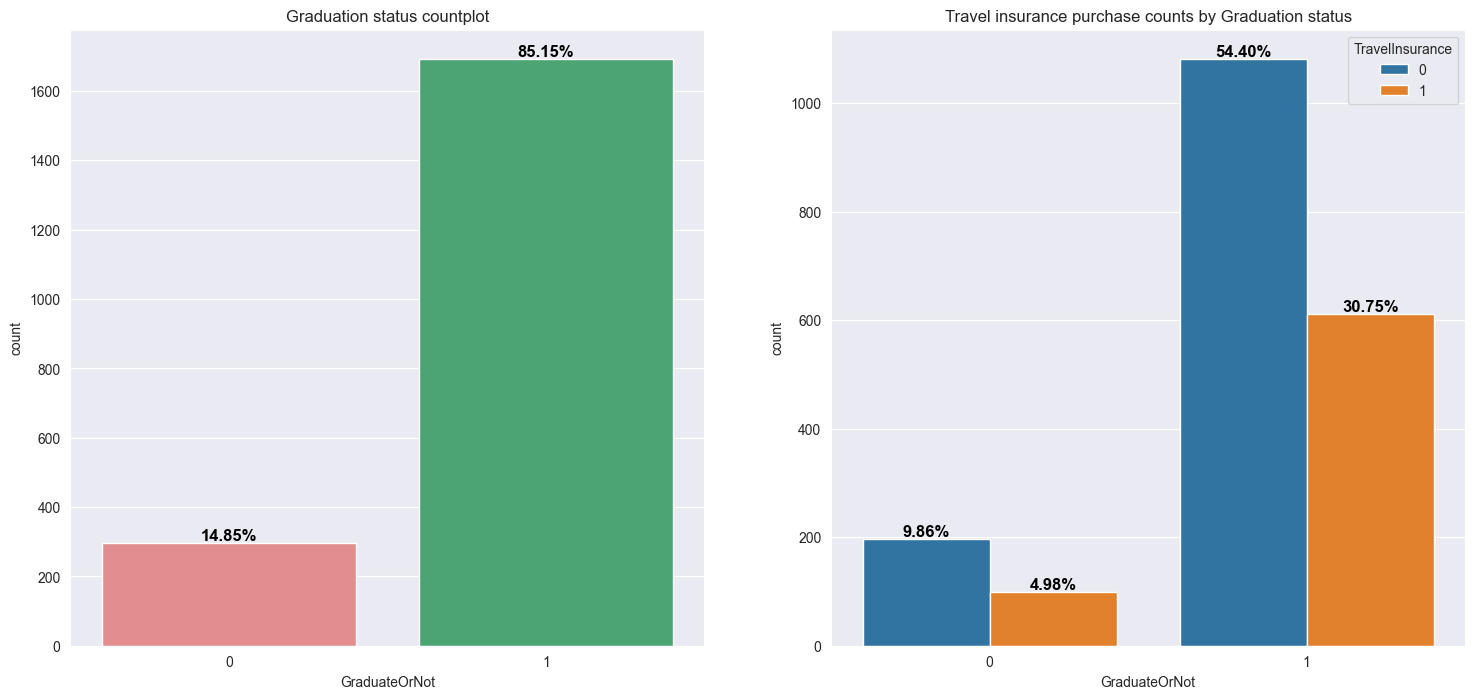

<IPython.core.display.Javascript object>

In [24]:
hf.visualize_double_countplots(data, 'GraduateOrNot', 'TravelInsurance',
                            'Graduation status countplot',
                            'Travel insurance purchase counts by Graduation status',
                             x_axis_label_order = ['0', '1'],
                             left_plot_colors = ["lightcoral", "mediumseagreen"])

In [25]:
data[['GraduateOrNot', 'TravelInsurance']].astype('int').groupby(['GraduateOrNot']).mean()

,TravelInsurance
GraduateOrNot,
0,0.335593
1,0.361111


<IPython.core.display.Javascript object>

- Most clients in the dataset are college graduates.
- Around a third part of clients have purchased insurance in each category - graduates and non-graduates.

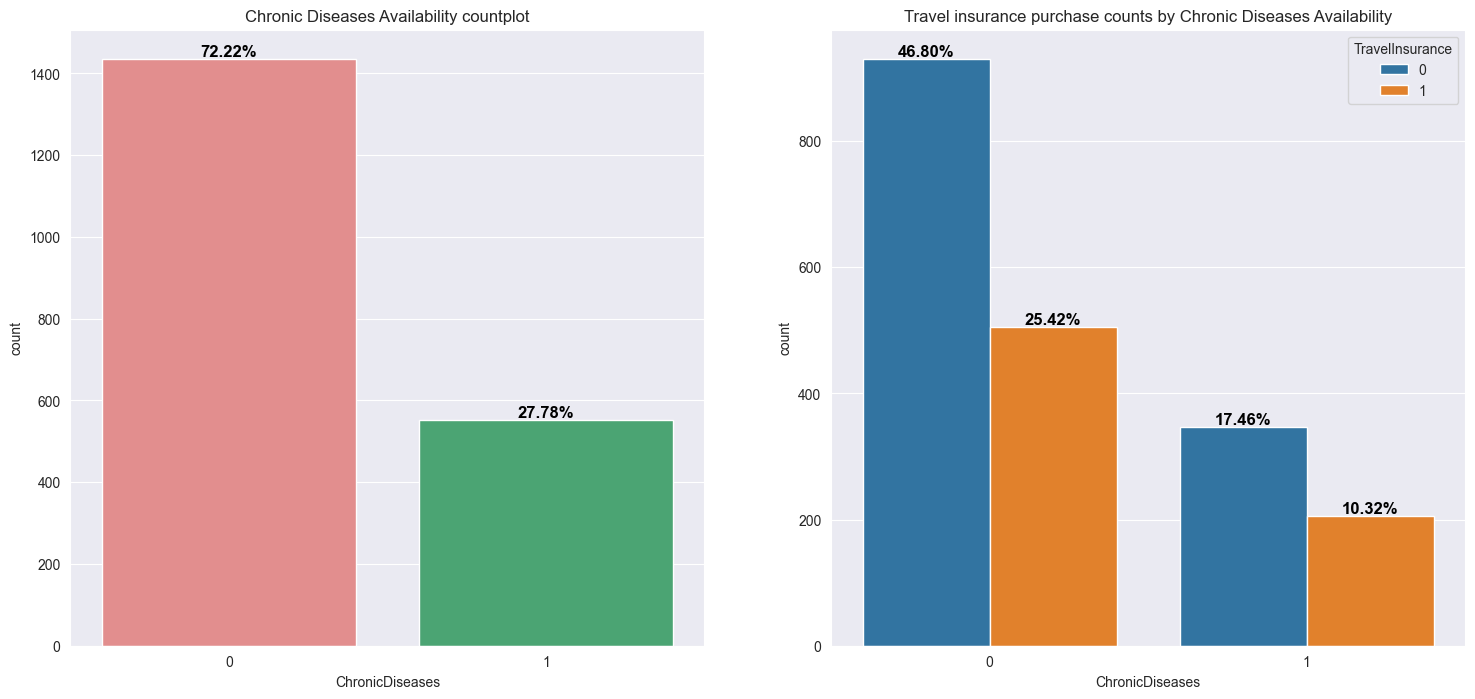

<IPython.core.display.Javascript object>

In [26]:
hf.visualize_double_countplots(data, 'ChronicDiseases', 'TravelInsurance',
                            'Chronic Diseases Availability countplot',
                            'Travel insurance purchase counts by Chronic Diseases Availability',
                             x_axis_label_order = ['0', '1'],
                             left_plot_colors = ["lightcoral", "mediumseagreen"])

In [27]:
data[['ChronicDiseases', 'TravelInsurance']].astype('int').groupby(['ChronicDiseases']).mean()

,TravelInsurance
ChronicDiseases,
0,0.351916
1,0.371377


<IPython.core.display.Javascript object>

- Almost a third of people in the dataset have chronic diseases. The probability of purchasing a travel insurance is slightly higher among people who have chronic diseases.

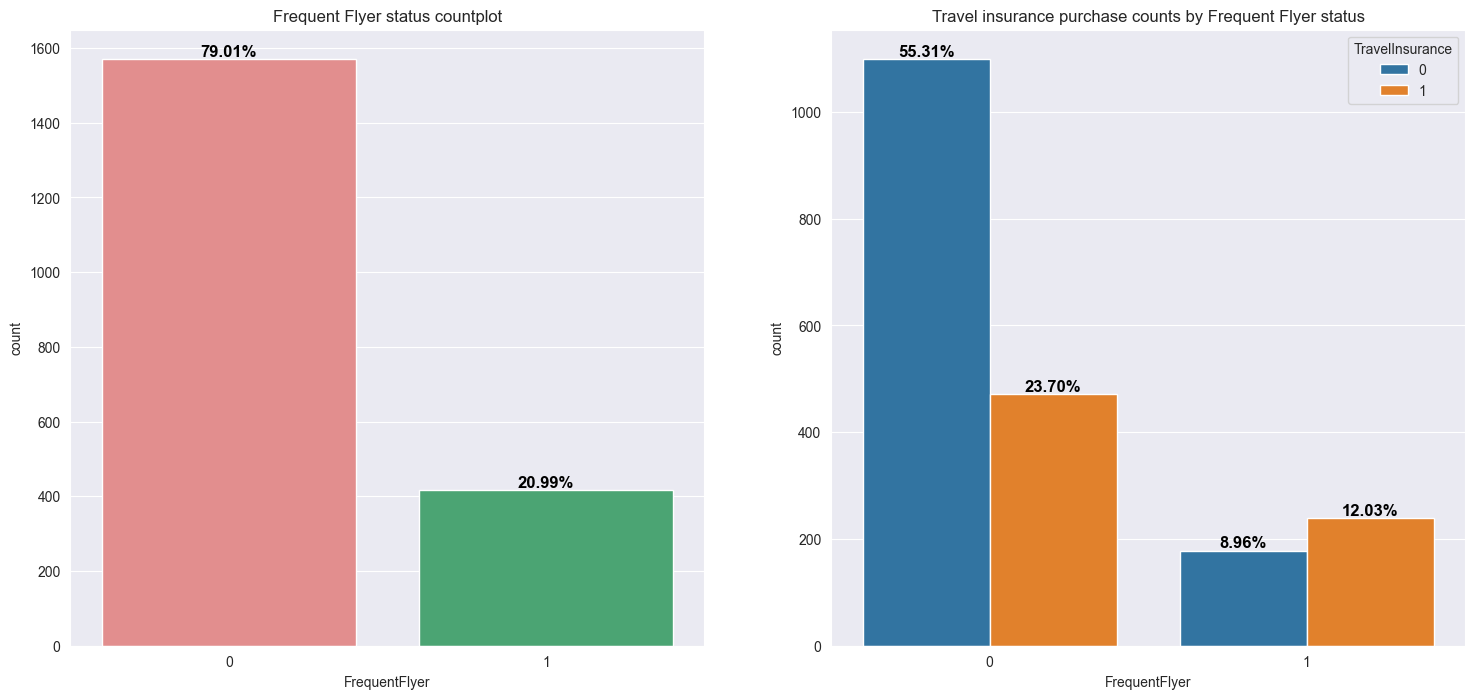

<IPython.core.display.Javascript object>

In [28]:
hf.visualize_double_countplots(data, 'FrequentFlyer', 'TravelInsurance',
                            'Frequent Flyer status countplot',
                            'Travel insurance purchase counts by Frequent Flyer status',
                             x_axis_label_order = ['0', '1'],
                             left_plot_colors = ["lightcoral", "mediumseagreen"])

In [29]:
data[['FrequentFlyer', 'TravelInsurance']].astype('int').groupby(['FrequentFlyer']).mean()

,TravelInsurance
FrequentFlyer,
0,0.300000
1,0.573141


<IPython.core.display.Javascript object>

- The share of frequent flyers (people who booked flights on at least 4 different instances in the last 2 Years (2017-2019)) in the dataset is around 21%. The majority of frequent flyers (around 57%) tend to buy an insurance.

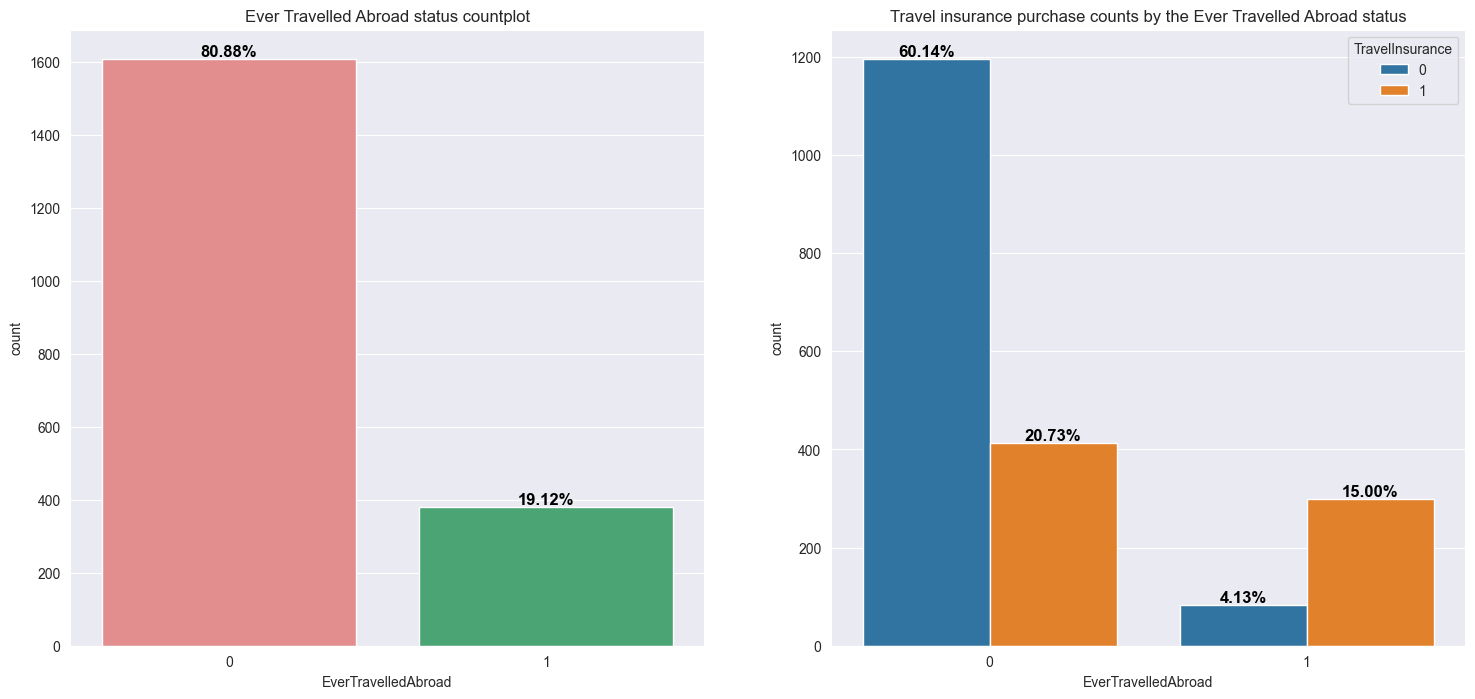

<IPython.core.display.Javascript object>

In [30]:
hf.visualize_double_countplots(data, 'EverTravelledAbroad', 'TravelInsurance',
                            'Ever Travelled Abroad status countplot',
                            'Travel insurance purchase counts by the Ever Travelled Abroad status',
                             x_axis_label_order = ['0', '1'],
                             left_plot_colors = ["lightcoral", "mediumseagreen"])

In [31]:
data[['EverTravelledAbroad', 'TravelInsurance']].astype('int').groupby(['EverTravelledAbroad']).mean()

,TravelInsurance
EverTravelledAbroad,
0,0.256378
1,0.784211


<IPython.core.display.Javascript object>

- The majority of customers in the dataset have never travelled abroad before (around 80%). The probability of purchasing a travel insurance is noticeably higher among people who have travelled abroad before.

## 1.5. Numerical features

##### Main insights and observations:
- Among the numeric features, annual income has the most visible difference between the groups who have purchased the travel insurance and who haven't.
- Based on mean and median values, people who have purchased a travel insurance are a bit older and may have more family members.
- Families of more than 2 people are highly likely to purchase a travel insurance. This may be due to traveling with children.

In [32]:
data[num_cols+['TravelInsurance']].groupby('TravelInsurance').mean()

,Age,FamilyMembers,AnnualIncome_eur
TravelInsurance,,,
0,29.517619,4.657009,9280.689115
1,29.888732,4.925352,12805.605634


<IPython.core.display.Javascript object>

In [33]:
data[num_cols+['TravelInsurance']].groupby('TravelInsurance').median()

,Age,FamilyMembers,AnnualIncome_eur
TravelInsurance,,,
0,29.0,4.0,9040.0
1,30.0,5.0,14125.0


<IPython.core.display.Javascript object>

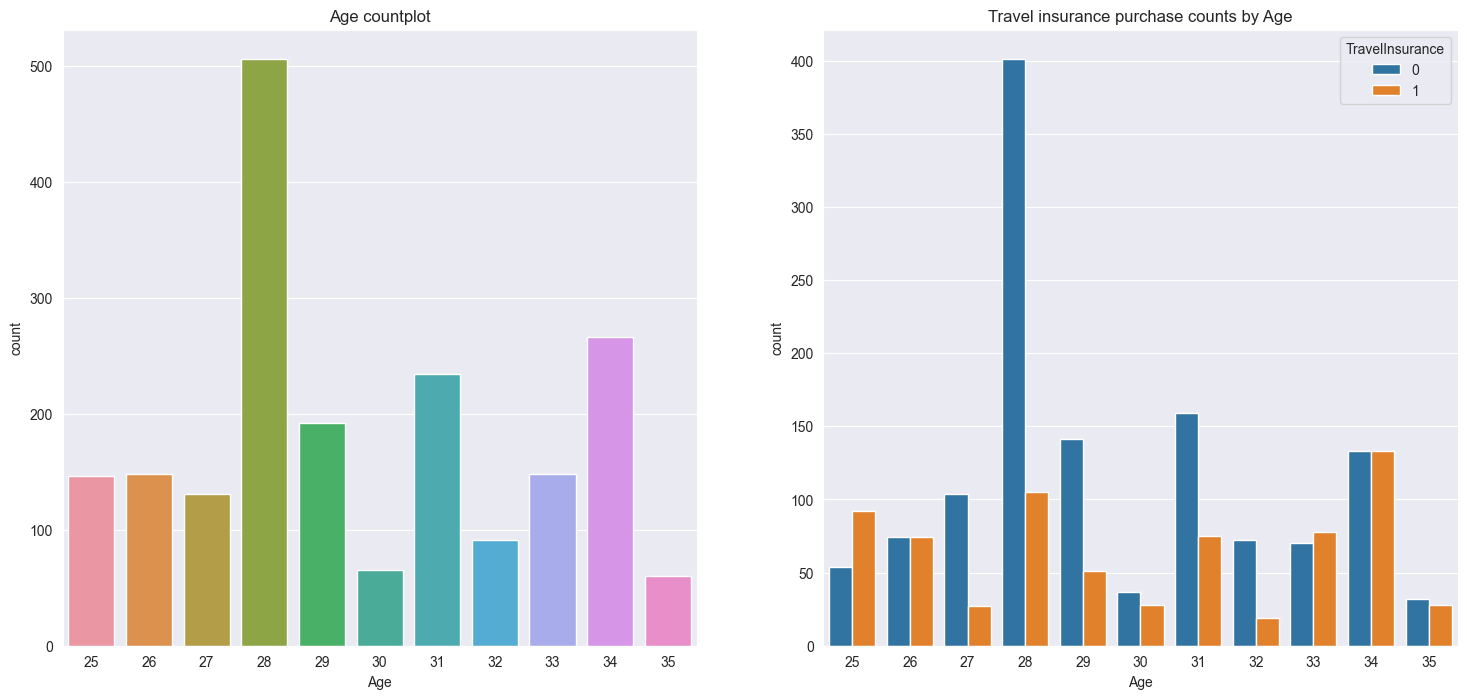

<IPython.core.display.Javascript object>

In [34]:
hf.visualize_double_countplots(data, 'Age', 'TravelInsurance',
                            'Age countplot',
                            'Travel insurance purchase counts by Age',
                             percentages=False)

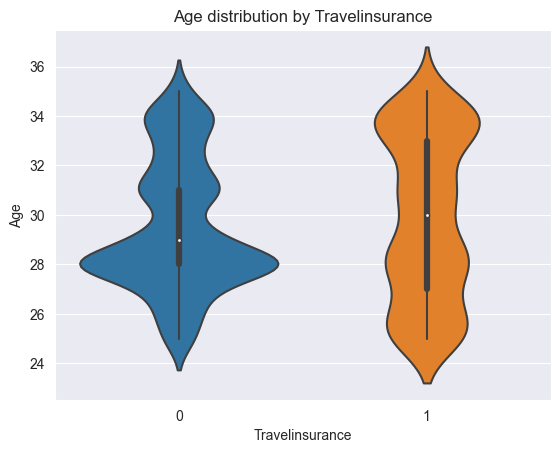

<IPython.core.display.Javascript object>

In [35]:
hf.visualize_violinplot(data, 'TravelInsurance', 'Age')

In [36]:
age_df = data.copy()
avg_age = round(data.Age.mean())
age_df['OlderThanAvg'] = age_df['Age'].apply(lambda x: 1 if x >= avg_age else 0)
age_df[['OlderThanAvg', 'TravelInsurance']].astype('int').groupby('OlderThanAvg').mean()

,TravelInsurance
OlderThanAvg,
0,0.310775
1,0.417824


<IPython.core.display.Javascript object>

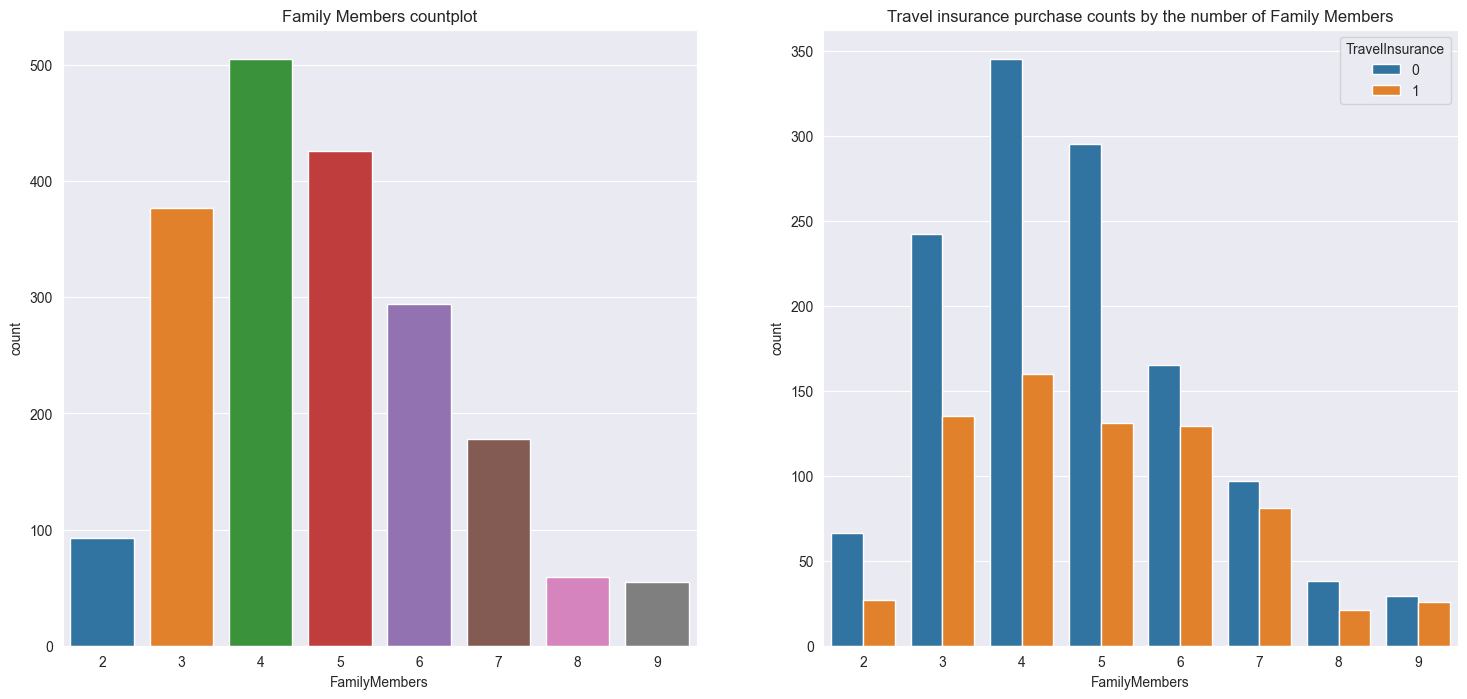

<IPython.core.display.Javascript object>

In [37]:
hf.visualize_double_countplots(data, 'FamilyMembers', 'TravelInsurance',
                            'Family Members countplot',
                            'Travel insurance purchase counts by the number of Family Members',
                             percentages=False)

In [38]:
data[['FamilyMembers', 'TravelInsurance']].astype('int').groupby(['FamilyMembers']).mean()

,TravelInsurance
FamilyMembers,
2,0.290323
3,0.358090
4,0.316832
5,0.307512
6,0.438776
7,0.455056
8,0.355932
9,0.472727


<IPython.core.display.Javascript object>

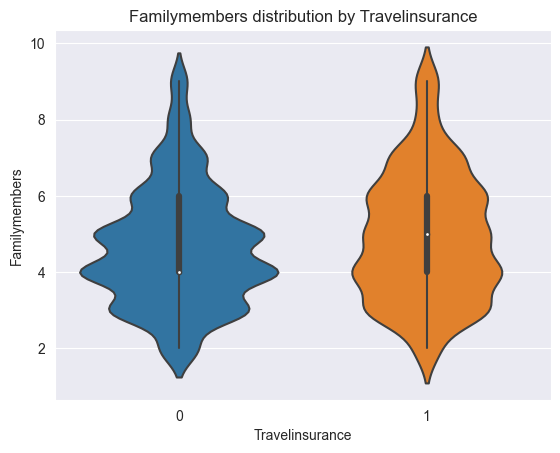

<IPython.core.display.Javascript object>

In [39]:
hf.visualize_violinplot(data, 'TravelInsurance', 'FamilyMembers')

Let's also check whether clients with families of more than 2 members tend to buy a travel insurance more:

In [40]:
expanded_df = data.copy()
expanded_df['MoreThan2Members'] = expanded_df['FamilyMembers'].apply(lambda x: 1 if x > 2 else 0)
expanded_df[['MoreThan2Members', 'TravelInsurance']].astype('int').groupby('MoreThan2Members').mean()

,TravelInsurance
MoreThan2Members,
0,0.290323
1,0.360612


<IPython.core.display.Javascript object>

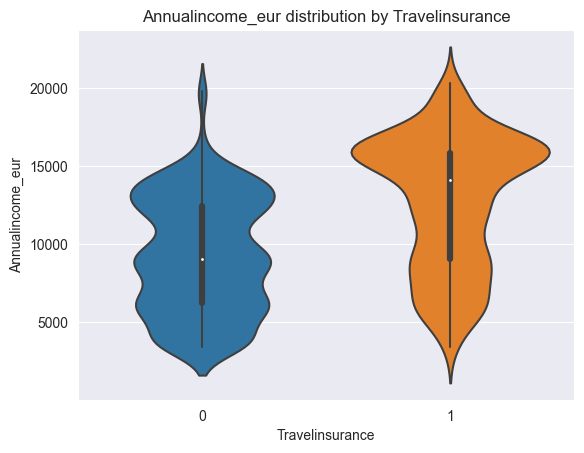

<IPython.core.display.Javascript object>

In [41]:
hf.visualize_violinplot(data, 'TravelInsurance', 'AnnualIncome_eur')

Are people with income higher than average more likely to buy an insurance?

In [42]:
income_df = data.copy()
avg_income = round(income_df.AnnualIncome_eur.mean())
income_df['HigherAnnualIncome'] = income_df['AnnualIncome_eur'].apply(lambda x: 1 if x > avg_income else 0)
income_df[['HigherAnnualIncome', 'TravelInsurance']].astype('int').groupby('HigherAnnualIncome').mean()

,TravelInsurance
HigherAnnualIncome,
0,0.222660
1,0.497942


<IPython.core.display.Javascript object>

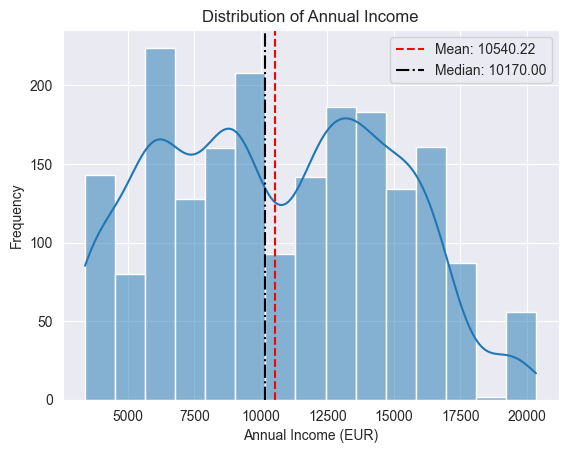

<IPython.core.display.Javascript object>

In [43]:
sns.histplot(data=data, x='AnnualIncome_eur', kde=True)
plt.xlabel('Annual Income (EUR)')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')
mean_value = data['AnnualIncome_eur'].mean()
median_value = data['AnnualIncome_eur'].median()
plt.axvline(x=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(x=median_value, color='black', linestyle='-.', label=f'Median: {median_value:.2f}')
plt.legend()
plt.show()

- Based on the distribution of annual income values (in euros), we can see that the data is slightly skewed to the right, so we have a few richer clients in the dataset. The distribution looks a bit like a bimodal, that have two slight peaks. The mean and median incomes almost the same (with mean being slightly higher), so the data is not significantly skewed.

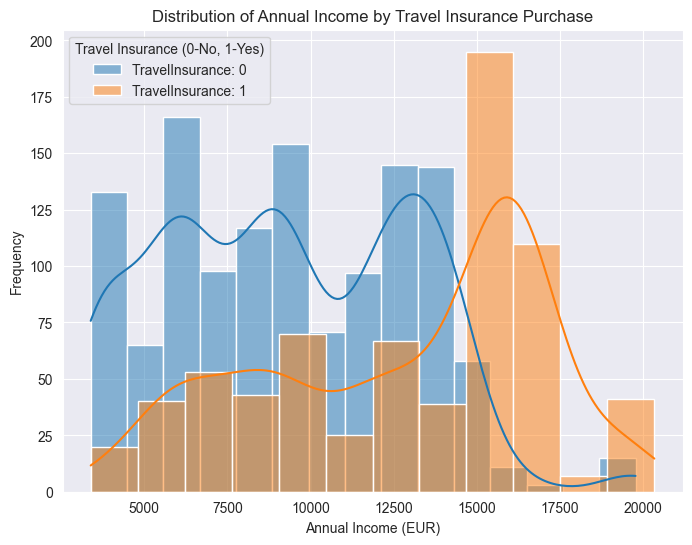

<IPython.core.display.Javascript object>

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))

for category in data['TravelInsurance'].unique():
    sns.histplot(data=data[data['TravelInsurance'] == category], x='AnnualIncome_eur', label=f'TravelInsurance: {category}', kde=True, ax=ax)

plt.xlabel('Annual Income (EUR)')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income by Travel Insurance Purchase')
plt.legend(title='Travel Insurance (0-No, 1-Yes)')
plt.show()

- By analyzing the distribution of annual income by the purchase of a travel insurance, we can observe that people with higher income buy insurance more often.

- Among the numeric features, annual income has the most visible difference between the groups who have purchased the travel insurance and who haven't.
- Based on mean and median values, people who have purchased a travel insurance are a bit older and may have more family members.
- Families of more than 2 people are highly likely to purchase a travel insurance. This may be due to traveling with children.

## 1.6. Correlations

##### Main insights and observations:
- The numeric features are not strongly correlated.
- Some binary categorical features are moderately correlated (like TravelInsurance and EverTravelledAbroad/FrequentFlyer, EverTravelledAbroad and FrequentFlyer). But the correlations are not significantly strong.

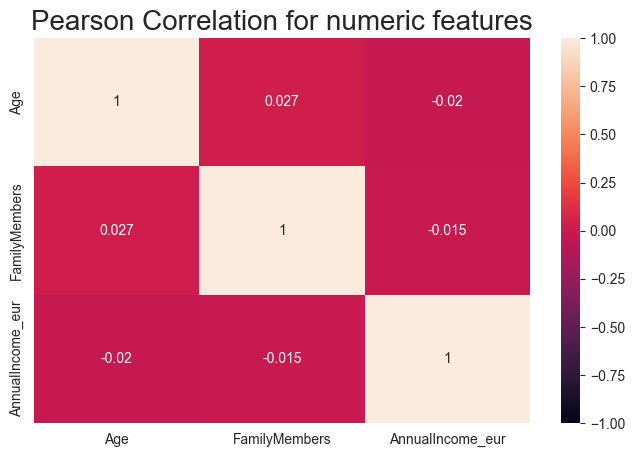

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(8, 5))
plt.title("Pearson Correlation for numeric features", fontsize=20)
ax = sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1)

- The numeric features are not strongly correlated.

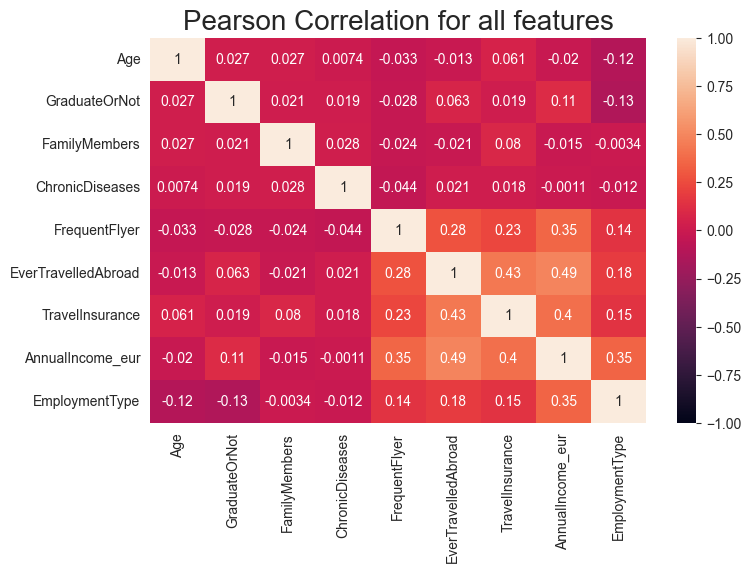

<IPython.core.display.Javascript object>

In [47]:
encoded_df = data.copy()
encoded_df[cat_cols[1:]] = encoded_df[cat_cols[1:]].astype('int')
encoded_df['EmploymentType'] = encoded_df['Employment Type'].replace({'Government Sector': 0,
                                                                    'Private Sector/Self Employed': 1})
encoded_df.drop(columns=['Employment Type'], inplace=True)

plt.figure(figsize=(8, 5))
plt.title("Pearson Correlation for all features", fontsize=20)
ax = sns.heatmap(encoded_df.corr(), annot=True, vmin=-1, vmax=1)

Let's explore the correlations between binary categorical columns with the Phi coefficient (φ), also known as the point-biserial correlation for binary variables. It measures the association between two binary variables and ranges from -1 to 1, where -1 indicates a perfect negative association, 1 indicates a perfect positive association, and 0 indicates no association.

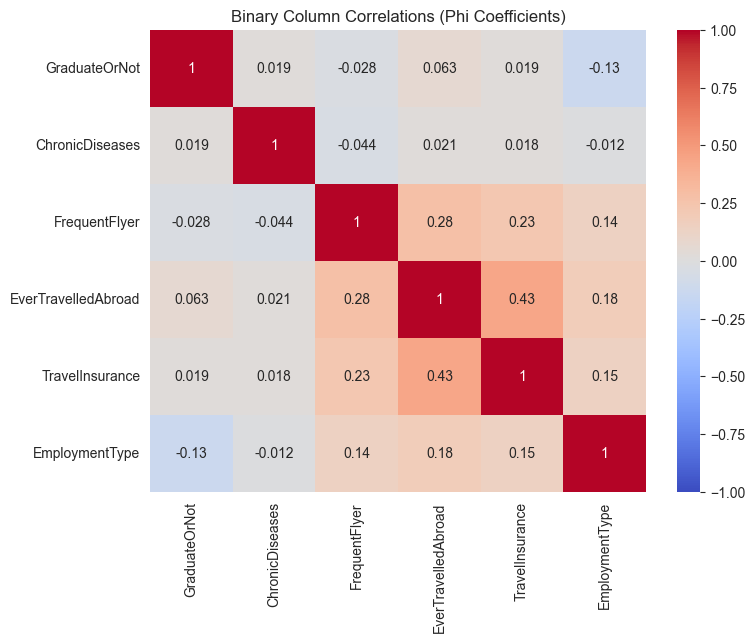

<IPython.core.display.Javascript object>

In [48]:
categoical_df = data[cat_cols[1:]].astype('int')
categoical_df['EmploymentType'] = data['Employment Type'].replace({'Government Sector': 0,
                                                                    'Private Sector/Self Employed': 1})

def phi_coefficient(x, y):
    n11 = np.sum((x == 1) & (y == 1))
    n10 = np.sum((x == 1) & (y == 0))
    n01 = np.sum((x == 0) & (y == 1))
    n00 = np.sum((x == 0) & (y == 0))

    phi = (n11 * n00 - n10 * n01) / np.sqrt((n11 + n10) * (n11 + n01) * (n10 + n00) * (n01 + n00))
    return phi

corr_matrix = pd.DataFrame(index=categoical_df.columns, columns=categoical_df.columns)

for col1 in categoical_df.columns:
    for col2 in categoical_df.columns:
        phi = phi_coefficient(categoical_df[col1], categoical_df[col2])
        corr_matrix.loc[col1, col2] = phi

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Binary Column Correlations (Phi Coefficients)")
plt.show()

- Some binary categorical features are moderately correlated (like TravelInsurance and EverTravelledAbroad/FrequentFlyer, EverTravelledAbroad and FrequentFlyer). But the correlations are not significantly strong.

# 2. Statistical Inference

##### Main insights and observations:
-  People with income higher than average (around 10.5K euros) are significantly more likely to buy a travel insurance.
- People with higher annual income are more likely to buy a travel insurance.
- People who are frequent flyers, have been abroad at some point in their lives before, and work in the private sector or are self-employed are more likely to buy a travel insurance.


## 2.1. Hypothesis Testing

### 2.1.1. Hypothesis #1: Are people with income higher than average significantly more likely to buy an insurance?


- H0: There is no significant difference in probabilities of buying a travel insurance.
- H1: There is a statistically significant difference.
- Tool used: Chi-Square Statistic (measures the strength of the association between the two categorical variables).
- Results: There is a significant difference.

- People with annual income higher than 10.5K euros are more likely to buy a travel insurance.

In [49]:
income_df = data.copy()
avg_income = round(income_df.AnnualIncome_eur.mean())
print("Average annual income(eur): ", avg_income)
income_df['HigherAnnualIncome'] = income_df['AnnualIncome_eur'].apply(lambda x: 1 if x > avg_income else 0)
income_df[['HigherAnnualIncome', 'TravelInsurance']].astype('int').groupby('HigherAnnualIncome').mean()

Average annual income(eur):  10540


,TravelInsurance
HigherAnnualIncome,
0,0.222660
1,0.497942


<IPython.core.display.Javascript object>

In [50]:
income_df.HigherAnnualIncome.value_counts()

HigherAnnualIncome
0    1015
1     972
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [51]:
hf.chi_square_test(income_df, 'HigherAnnualIncome', 'TravelInsurance')

{'Chi-Square Statistic': 162.6500660759668,
 'P-value': 2.9831121619018706e-37,
 'Degrees of Freedom': 1,
 'Expected Frequencies Table': array([[652.31756417, 362.68243583],
        [624.68243583, 347.31756417]]),
 'Significance Level (alpha)': 0.05,
 'Hypothesis Test Result': 'Reject the null hypothesis: There is a significant association between the two features.'}

<IPython.core.display.Javascript object>

**Explaining the results:**
- Chi-Square Statistic: This value measures the strength of the association between the two categorical variables. A higher value indicates a stronger association.
- P-value: This is the probability that the observed association (or a stronger one) between the variables occurred by chance. If the p-value is small (typically less than 0.05), it suggests that there is a significant association.
- Degrees of Freedom: This represents the number of categories minus one in the contingency table.
- Expected Frequencies Table: This table shows the expected counts for each cell in the contingency table under the assumption of independence. Comparing this table to the observed counts can give you insights into the nature of the association.

### 2.1.2. Hypothesis #2: Are median annual incomes are significantly different between groups of people who purchased a travel insurance and who didn't?

- H0: There is no significant in median annual incomes between two groups.
- H1: There is a significant difference in median annual incomes.
- Tool used: Mann-Whitney U test (since the data doesn't fully meet the assumptions for the t-test)
- Results: The median annual income is significantly higher for people who have purchased a travel insurance.

- People with higher annual income are more likely to buy a travel insurance.

In [52]:
data[['AnnualIncome_eur', 'TravelInsurance']].groupby('TravelInsurance').median()

,AnnualIncome_eur
TravelInsurance,
0,9040.0
1,14125.0


<IPython.core.display.Javascript object>

In [53]:
with_insurance = data[data['TravelInsurance'] == '1']
no_insurance = data[data['TravelInsurance'] == '0']

<IPython.core.display.Javascript object>

Results of the tests for assumptions for 2-sample t-tests for groups in AnnualIncome_eur:
----------------------------------------------------------------------
Shapiro-Wilk Test - Group 1: Statistic = 0.9257092475891113 P-value = 3.038776400003646e-18
Shapiro-Wilk Test - Group 2: Statistic = 0.9574989080429077 P-value = 8.074549398830522e-19
Levene's Test - P-value = 3.465231336441896e-05
One or both groups may not meet the assumptions for the t-test.
--------------------------------------------------
D'Agostino and Pearson's omnibus Test for Normality - Group 1: Statistic = 152.7467013977529 P-value = 6.783834231128676e-34
D'Agostino and Pearson's omnibus Test for Normality - Group 2: Statistic = 108.80689540121253 P-value = 2.3598416781342165e-24
One or both groups may not be normally distributed.
--------------------------------------------------


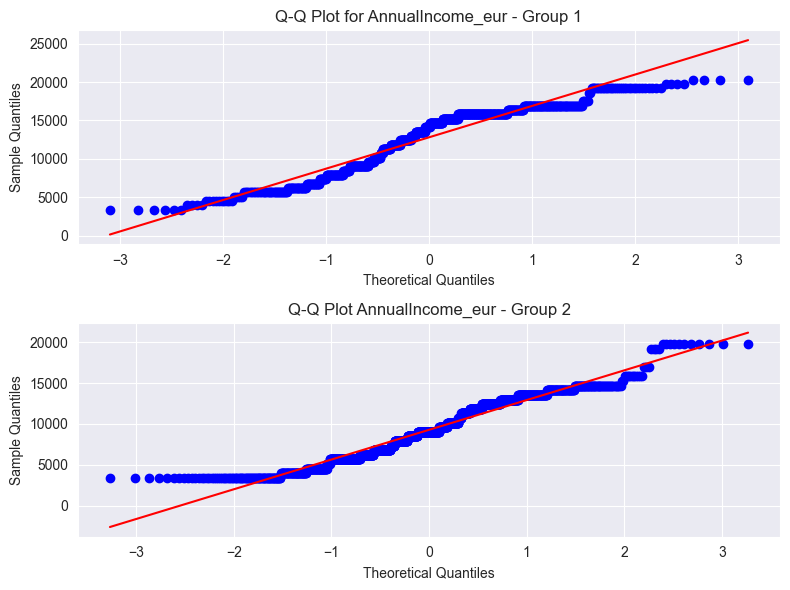

<IPython.core.display.Javascript object>

In [54]:
hf.test_two_sample_ttest_assumptions(with_insurance, no_insurance, 'AnnualIncome_eur')

In [55]:
U_statistic, p_value = mannwhitneyu(with_insurance['AnnualIncome_eur'], no_insurance['AnnualIncome_eur'], alternative='two-sided')
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in medians between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in medians between the two groups.")

Reject the null hypothesis: There is a significant difference in medians between the two groups.


<IPython.core.display.Javascript object>

### 2.1.3. Hypothesis #3: Do clients with families of more than 2 members tend to buy a travel insurance more frequently?

- H0: There is no significant association between the travel insurance purchases among smaller and bigger families (<=2 and >2 members).
- H1: There is a significant association between these features.
- Tool used: Chi-Square Statistic (measures the strength of the association between the two categorical variables).
- Result: The association between these two features is not statistically significant at a 95% significance level.
- Note: The groups are imbalanced, so we should take the results with a grain of salt.

In [56]:
expanded_df = data.copy()
expanded_df['MoreThan2Members'] = expanded_df['FamilyMembers'].apply(lambda x: 1 if x > 2 else 0)
expanded_df[['MoreThan2Members', 'TravelInsurance']].astype('int').groupby('MoreThan2Members').mean()

,TravelInsurance
MoreThan2Members,
0,0.290323
1,0.360612


<IPython.core.display.Javascript object>

In [57]:
expanded_df.MoreThan2Members.value_counts()

MoreThan2Members
1    1894
0      93
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [58]:
hf.chi_square_test(expanded_df, 'MoreThan2Members', 'TravelInsurance')

{'Chi-Square Statistic': 1.6134015798425805,
 'P-value': 0.20401430325862907,
 'Degrees of Freedom': 1,
 'Expected Frequencies Table': array([[  59.76899849,   33.23100151],
        [1217.23100151,  676.76899849]]),
 'Significance Level (alpha)': 0.05,
 'Hypothesis Test Result': 'Fail to reject the null hypothesis: There is no significant association between the two features.'}

<IPython.core.display.Javascript object>

### 2.1.4. Hypothesis #4: Is there a significant association between the purchase of a travel insurance and being a frequent flyer, having a foreign travel experience, having a certain employment type?

- H0: There is no significant association between the purchase of a travel insurance and being a frequent flyer, having a foreign travel experience, having a certain employment type.
- H1: There is a significant association between these features.
- Tool used: Chi-Square Statistic (measures the strength of the association between the two categorical variables).
- Results: there is a significant association between the purchase of a travel insurance and being a frequent flyer, having a foreign travel experience, having a certain employment type.

- People who are frequent flyers, have been abroad at some point in their lives before, and work in the private sector or are self-employed are more likely to buy a travel insurance.

In [59]:
hf.chi_square_test(data, 'FrequentFlyer', 'TravelInsurance')

{'Chi-Square Statistic': 105.85723074203977,
 'P-value': 7.92436041506454e-25,
 'Degrees of Freedom': 1,
 'Expected Frequencies Table': array([[1009.0035229,  560.9964771],
        [ 267.9964771,  149.0035229]]),
 'Significance Level (alpha)': 0.05,
 'Hypothesis Test Result': 'Reject the null hypothesis: There is a significant association between the two features.'}

<IPython.core.display.Javascript object>

In [60]:
data[['FrequentFlyer', 'TravelInsurance']].astype('int').groupby(['FrequentFlyer']).mean()

,TravelInsurance
FrequentFlyer,
0,0.300000
1,0.573141


<IPython.core.display.Javascript object>

In [61]:
hf.chi_square_test(data, 'EverTravelledAbroad', 'TravelInsurance')

{'Chi-Square Statistic': 370.5599281861554,
 'P-value': 1.4134505859999571e-82,
 'Degrees of Freedom': 1,
 'Expected Frequencies Table': array([[1032.78258681,  574.21741319],
        [ 244.21741319,  135.78258681]]),
 'Significance Level (alpha)': 0.05,
 'Hypothesis Test Result': 'Reject the null hypothesis: There is a significant association between the two features.'}

<IPython.core.display.Javascript object>

In [62]:
data[['EverTravelledAbroad', 'TravelInsurance']].astype('int').groupby(['EverTravelledAbroad']).mean()

,TravelInsurance
EverTravelledAbroad,
0,0.256378
1,0.784211


<IPython.core.display.Javascript object>

In [63]:
hf.chi_square_test(data, 'Employment Type', 'TravelInsurance')

{'Chi-Square Statistic': 42.75380328896317,
 'P-value': 6.208106601512192e-11,
 'Degrees of Freedom': 1,
 'Expected Frequencies Table': array([[366.32611978, 203.67388022],
        [910.67388022, 506.32611978]]),
 'Significance Level (alpha)': 0.05,
 'Hypothesis Test Result': 'Reject the null hypothesis: There is a significant association between the two features.'}

<IPython.core.display.Javascript object>

In [64]:
short_df = data[['Employment Type', 'TravelInsurance']]
short_df.TravelInsurance = short_df.TravelInsurance.astype('int')
short_df.groupby(['Employment Type']).mean()

,TravelInsurance
Employment Type,
Government Sector,0.245614
Private Sector/Self Employed,0.402258


<IPython.core.display.Javascript object>

## 2.2. Confidence intervals

##### Main insights and observations:
- Clients who have purchased a travel insurance tend to have annual income somewhere between 12494 and 13117 euros (with a 95% confidence interval)

##### Notes:
- Since this is data collected from unknown place in 2019, we cannot really apply these confidence intervals in real life. But these intervals still may be helpful to the region they were collected in.

In [65]:
print(f"95% confidence interval for annual income for people who purchased a travel insurance:")
print(sm.stats.DescrStatsW(with_insurance['AnnualIncome_eur']).zconfint_mean())
print("")
print(f"95% confidence interval for annual income for people who didn't purchase a travel insurance:")
print(sm.stats.DescrStatsW(no_insurance['AnnualIncome_eur']).zconfint_mean())

95% confidence interval for annual income for people who purchased a travel insurance:
(12494.040602387808, 13117.170665217827)

95% confidence interval for annual income for people who didn't purchase a travel insurance:
(9076.847194391208, 9484.531035835887)


<IPython.core.display.Javascript object>

# 3. Applying ML Models

#### Main insights and observations:
- The most important features based on the Gradient Boosting Classifier are: annual income, number of family members and age.
- The top performing models are: Support Vector Machines Classifier with RBF kernel (around 83.1% accuracy) and the Gradient Boosting Classifier (around 84.1% accuracy).
- Ensembling the best models gives a slight accuracy boost.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

<IPython.core.display.Javascript object>

In [67]:
data.TravelInsurance.value_counts() / len(data)

TravelInsurance
0    0.642677
1    0.357323
Name: count, dtype: float64

<IPython.core.display.Javascript object>

If we simply predict that all customers would not purchase a travel insurance, we will be correct in 64% of cases. Our models should have better accuracy, and we also should use other performance metrics.

In [117]:
processed_df = data.copy()
processed_df['EmploymentType'] = processed_df['Employment Type'].replace({'Government Sector': '0',
                                                                          'Private Sector/Self Employed': '1'})
processed_df.drop(columns=['Employment Type'], inplace=True)

categorical_cols = ['EmploymentType', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer',
                 'EverTravelledAbroad', 'TravelInsurance']

<IPython.core.display.Javascript object>

In [118]:
significant_cat_cols = ['EmploymentType', 'FrequentFlyer', 'EverTravelledAbroad']

<IPython.core.display.Javascript object>

In [119]:
target = 'TravelInsurance'
X = processed_df.drop(target, axis=1)
y = processed_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=processed_df[categorical_cols[:-1]], random_state=42)

<IPython.core.display.Javascript object>

In [120]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

X_train[num_cols] = num_pipeline.fit_transform(X_train[num_cols])
X_test[num_cols] = num_pipeline.transform(X_test[num_cols])

<IPython.core.display.Javascript object>

Let's try a couple of different algorithms without setting their parameters using 10-fold cross validation. We want to select top performing models to improve further.

In [145]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
model_names=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']

models = [
    svm.SVC(kernel='linear'),  
    svm.SVC(kernel='rbf'),     
    LogisticRegression(),    
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier()
]

for i in models:
    model = i
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    model_names.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_cv=pd.DataFrame({'CV Mean Accuracy':model_names,'Std':std},index=classifiers)
models_cv

,CV Mean Accuracy,Std
Linear Svm,0.752058,0.022048
Radial Svm,0.810596,0.019796
Logistic Regression,0.766539,0.019167
KNN,0.779771,0.025083
Decision Tree,0.760871,0.024866
Naive Bayes,0.748913,0.027209
Random Forest,0.774719,0.018201


<IPython.core.display.Javascript object>

The top performing algorithms with default parameters (by accuracy) are: Support Vector Machines with Radial Basis Function (RBF) kernel, K-Nearest Neighbours, Random Forests, and Decision Trees.

<Axes: >

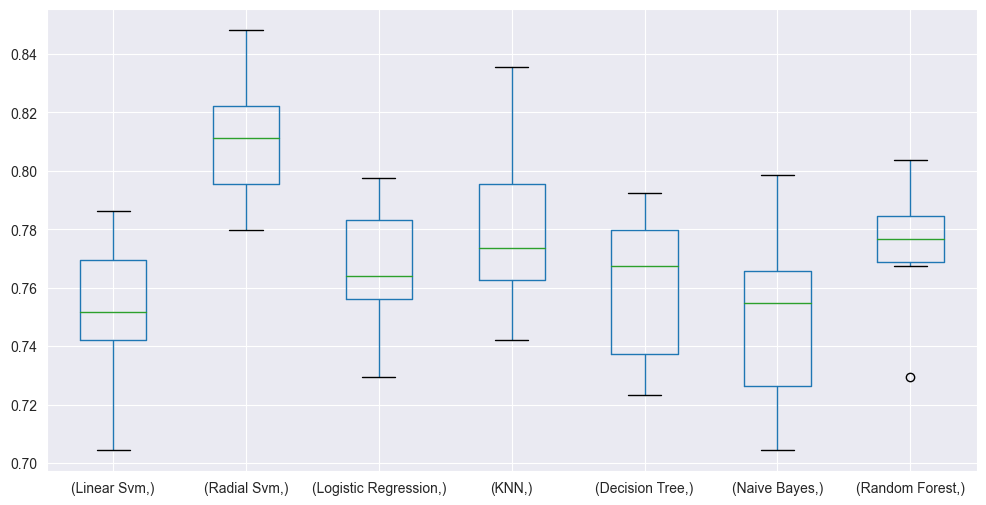

<IPython.core.display.Javascript object>

In [146]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

Now, let's use grid search for hyperparameters tuning for the best performing models:

#### Support Vector Machines with RBF Kernel

In [147]:
svc = svm.SVC(kernel='rbf', random_state=42)
param_grid = {'C': [0.05,0.1,0.25,0.5,0.7,0.75,0.8,0.9,1,2],
              'gamma': [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
gs_svm = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5, verbose=True, n_jobs=-1)
gs_svm.fit(X_train, y_train)
print(gs_svm.best_params_)
y_pred = gs_svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Fitting 5 folds for each of 110 candidates, totalling 550 fits
{'C': 2, 'gamma': 0.4}
Accuracy: 0.8542713567839196
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       260
           1       0.93      0.62      0.75       138

    accuracy                           0.85       398
   macro avg       0.88      0.80      0.82       398
weighted avg       0.87      0.85      0.85       398



<IPython.core.display.Javascript object>

#### K-Nearest Neighbours

In [143]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [i for i in range(1,50,2)]}
gs_knn = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5, verbose=True, n_jobs=-1)
gs_knn.fit(X_train, y_train)
print(gs_knn.best_params_)
y_pred = gs_knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'n_neighbors': 21}
0.8366834170854272
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89       260
           1       0.90      0.59      0.72       138

    accuracy                           0.84       398
   macro avg       0.86      0.78      0.80       398
weighted avg       0.85      0.84      0.83       398



<IPython.core.display.Javascript object>

#### Random Forest

In [142]:
rfc = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [i for i in range(50,1500,50)]}
gs_rfc = GridSearchCV(rfc, param_grid, scoring='accuracy', cv=5, verbose=True, n_jobs=-1)
gs_rfc.fit(X_train, y_train)
print(gs_rfc.best_params_)
y_pred = gs_rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
{'n_estimators': 300}
0.8140703517587939
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       260
           1       0.77      0.67      0.71       138

    accuracy                           0.81       398
   macro avg       0.80      0.78      0.79       398
weighted avg       0.81      0.81      0.81       398



<IPython.core.display.Javascript object>

The best model so far is SVC(C=2, gamma=0.4) with accuracy 85.4%. 

Now, let's see whether an ensemble model would perform better:

In [141]:
svc = svm.SVC(kernel='rbf', gamma=0.4, C=2, probability=True, random_state=42)
rf = RandomForestClassifier(n_estimators=300, random_state=42)
knn = KNeighborsClassifier(n_neighbors=21)

ensemble = VotingClassifier(
    estimators=[('svm', svc),
                ('rf', rf),
                ('knn', knn)],
    voting='soft')

ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, ensemble.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, ensemble.predict(X_test)))

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Training Accuracy: 0.8470736312146003
Testing Accuracy: 0.8567839195979899
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       260
           1       0.93      0.64      0.76       138

    accuracy                           0.86       398
   macro avg       0.88      0.81      0.83       398
weighted avg       0.87      0.86      0.85       398



<IPython.core.display.Javascript object>

Ensembling the best performing models with tuned hyperparameters gives a small accuracy boost.

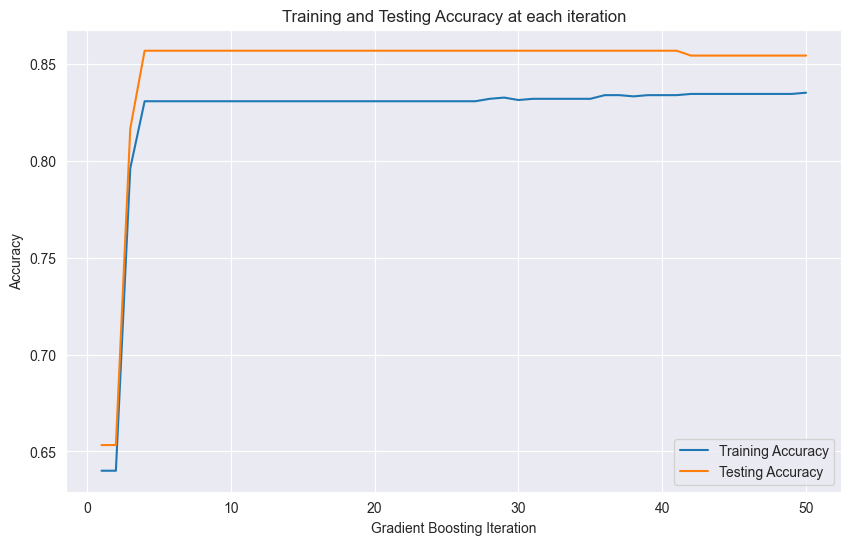

Training Accuracy: 0.8351164254247955
Testing Accuracy: 0.8542713567839196
Classification Report with Testing Data:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       260
           1       0.93      0.64      0.76       138

    accuracy                           0.86       398
   macro avg       0.88      0.81      0.83       398
weighted avg       0.87      0.86      0.85       398



<IPython.core.display.Javascript object>

In [127]:
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
clf.fit(X_train, y_train)

train_scores = []
val_scores = []

for stage_pred in clf.staged_predict(X_test):
    val_score = accuracy_score(y_test, stage_pred)
    val_scores.append(val_score)

for stage_pred in clf.staged_predict(X_train):
    train_score = accuracy_score(y_train, stage_pred)
    train_scores.append(train_score)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(train_scores) + 1), train_scores, label='Training Accuracy')
plt.plot(np.arange(1, len(val_scores) + 1), val_scores, label='Testing Accuracy')
plt.xlabel('Gradient Boosting Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy at each iteration')
plt.legend()
plt.grid(True)
plt.show()

print("Training Accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, clf.predict(X_test)))
class_report = classification_report(y_test, y_pred)
print("Classification Report with Testing Data:\n", class_report)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


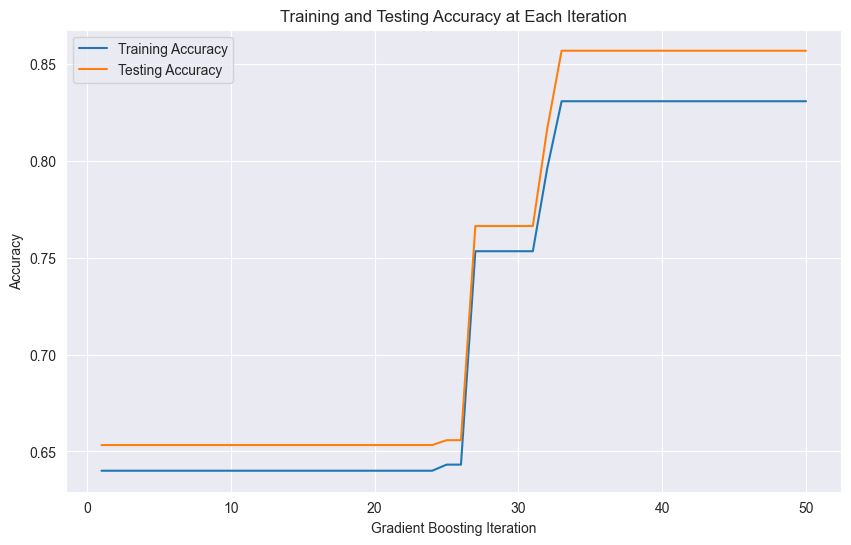

Final Training Accuracy: 0.8307111390811831
Final Testing Accuracy: 0.8567839195979899
Final Training F1-Score: 0.711063372717508
Final Testing F1-Score: 0.7532467532467533
Classification Report with Testing Data:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       260
           1       0.94      0.63      0.75       138

    accuracy                           0.86       398
   macro avg       0.88      0.80      0.83       398
weighted avg       0.87      0.86      0.85       398



<IPython.core.display.Javascript object>

In [128]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.5, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

clf = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_
print(grid_search.best_params_)

train_scores = []
test_scores = []

for stage_pred in best_clf.staged_predict(X_test):
    test_score = accuracy_score(y_test, stage_pred)
    test_scores.append(test_score)

for stage_pred in best_clf.staged_predict(X_train):
    train_score = accuracy_score(y_train, stage_pred)
    train_scores.append(train_score)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(train_scores) + 1), train_scores, label='Training Accuracy')
plt.plot(np.arange(1, len(test_scores) + 1), test_scores, label='Testing Accuracy')
plt.xlabel('Gradient Boosting Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy at Each Iteration')
plt.legend()
plt.grid(True)
plt.show()

final_train_accuracy = accuracy_score(y_train, best_clf.predict(X_train))
final_test_accuracy = accuracy_score(y_test, best_clf.predict(X_test))

final_train_f1 = f1_score(y_train, best_clf.predict(X_train), pos_label='1')
final_test_f1 = f1_score(y_test, best_clf.predict(X_test), pos_label='1')

print("Final Training Accuracy:", final_train_accuracy)
print("Final Testing Accuracy:", final_test_accuracy)

print("Final Training F1-Score:", final_train_f1)
print("Final Testing F1-Score:", final_test_f1)

y_pred = best_clf.predict(X_test)
class_report = classification_report(y_test, y_pred)
print("Classification Report with Testing Data:\n", class_report)

- Using Gradient Boosting Classifier with decision trees as weak learners gives a bit better accuracy of 85.6%.

#### Confusion Matrix and Feature Importances for the best performing model

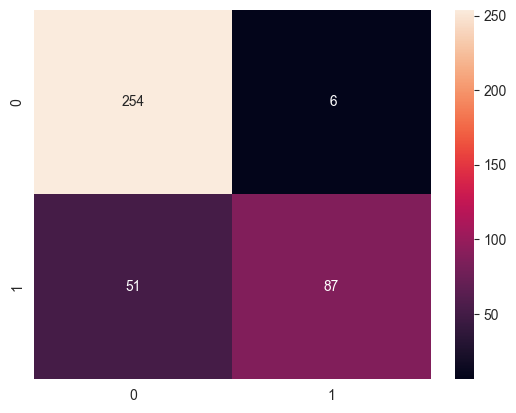

<IPython.core.display.Javascript object>

In [129]:
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=50, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')
plt.show()

Text(0.5, 1.0, 'Feature Importance in Gradient Boosting Classifier')

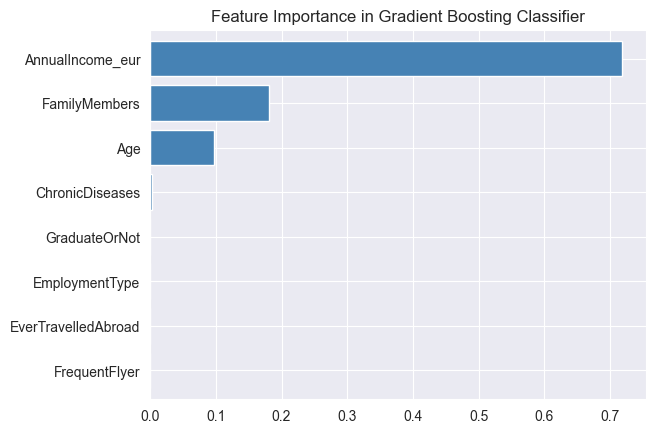

<IPython.core.display.Javascript object>

In [130]:
pd.Series(gb.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,color='steelblue')
plt.title('Feature Importance in Gradient Boosting Classifier')

- The most important features based on the Gradient Boosting Classifier are: annual income, number of family members and age.

# 4. Conclusions

##### Main insights and observations:
- Most tourists (almost 65%) in the dataset haven't purchased a travel insurance.
- Most tourists work in the private sector or are self-employed. In each group, the share of people who have purchased a travel insurance is lower.
- The share of people who purchased a travel insurance is higher in the Private sector/Self-employed group. This may be due to the fact that the other group - people working in the Government sector - get their insurance provided by the government, so they don't need to buy one at the travel agency. But the class size for Government sector workers is small, so this may not be representative of the broader population.
- Most clients in the dataset are college graduates. Around a third part of clients have purchased insurance in each category - graduates and non-graduates.
- Almost a third of people in the dataset have chronic diseases. The probability of purchasing a travel insurance is slightly higher among people who have chronic diseases.
- The share of frequent flyers in the dataset is around 21%. The majority of frequent flyers (around 57%) tend to buy an insurance.
- The majority of customers in the dataset have never travelled abroad before (around 80%). The probability of purchasing a travel insurance is noticeably higher among people who have travelled abroad before.
- Among the numeric features, annual income has the most visible difference between the groups who have purchased the travel insurance and who haven't.
- Based on mean and median values, people who have purchased a travel insurance are a bit older and may have more family members.
- People with income higher than average (around 10.5K euros) are significantly more likely to buy a travel insurance.
- People with higher annual income are more likely to buy a travel insurance.
- People who are frequent flyers, have been abroad at some point in their lives before, and work in the private sector or are self-employed are more likely to buy a travel insurance.
- Clients who have purchased a travel insurance tend to have annual income somewhere between 12494 and 13117 euros (with a 95% confidence interval)
- The most important features based on the Gradient Boosting Classifier are: annual income, number of family members and age.
- The top performing models are: Support Vector Machines Classifier with RBF kernel (around 85.4% accuracy) and the Gradient Boosting Classifier (around 85.6% accuracy).
- Ensembling the best models gives a slight accuracy boost.

## Recommendations:
- When assessing the probability of a travel insurance purchase, pay attention to annual income, age, family members, employment status and travel history.
- To generalize the predictive model, collect more data across other regions. Try to collect more data for under-represented classes.

## Further Analysis:
- ML models perform okay, but performance should be improved.
- It would also be useful to analyze more recent data (for the post-pandemic period), and also data from travel companies in multiple places, to get a better picture of the population patterns.